# Draft Figures notebook for tagging analysis

Rich Fiorella
February 18, 2021

Figure outline:
1) Bucket model schematic (not a python figure)
2) comparison to gnip (not ready yet)
3) plots of ln(f): annual, DJF, and JJA
4) scatter plots of d'18O vs ln(f)
5) correlation maps of ln(f) and d'18O, as well as regression slopes
6) plots of Tcond: annual, DJF, and JJA
7) scatter plot d18O vs Tcond
8) correlation maps of d18O and Tcond
9) plots of Q/P vs RT (annual, DJF, JJA)
10) scatter and correlation between Q/P and RT
11) d18O vs ln(R) an ln(Q/P) - compare to Aggarwal fig 2.
12) d18O vs ln(R) and ln(Q/P) anomalies - compare to Aggarwal fig. 3
13) scatters of three factors affecting d-excess (ws, T, RH)
14) correlation maps of these factors vs d-excess
15) (optional) which factor is most important where? (this question might be worth breaking out to an additional MS focused on all isotopologues?)

### Next code block reads in the data, and does some initial preprocessing for the figures to follow.

In [1]:
# set up packages and data
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy

# set plotting resolution
#dpi_out = 600 # lower res for drafts, higher res for final submission
#rc('text', usetex=True)
#rc('font',**{'family':'sans-serif','sans-serif':['Verdana']})

# calculate d18O_0, need to filter for things above x mm/day
thres = 0.1 # mm/day 
thres_mps = thres*(1/86400)*(1/1000) # convert mm/day -> m/s

ds = xr.open_dataset("../proc_data/iCAM6_nudg_monthly.nc", decode_timedelta = False)
ds_weighted = xr.open_dataset("../proc_data/iCAM6_nudg_WgtSeasAvg.nc", decode_timedelta = False)
ds_p1 = xr.open_dataset("../proc_data/iCAM6_nudg_AnnAvg.nc", decode_timedelta = False)
monthly_avr = xr.open_dataset('../proc_data/iCAM6_nudg_MonAvg.nc', decode_timedelta = False)
ds_ann = xr.open_dataset('../raw_data/iCAM6_nudged_annual_19801999.nc', decode_timedelta = False)
ds_ann

<xarray.Dataset>
Dimensions:         (lat: 192, lon: 288, nbnd: 2, time: 20)
Coordinates:
  * lat             (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time            (time) datetime64[ns] 1980-07-16T20:00:00 ... 1999-07-16T...
Dimensions without coordinates: nbnd
Data variables: (12/68)
    PRECRC_H2Or     (time, lat, lon) float32 ...
    PRECRL_H2OR     (time, lat, lon) float32 ...
    PRECSC_H2Os     (time, lat, lon) float32 ...
    PRECSL_H2OS     (time, lat, lon) float32 ...
    TUQ_H2O         (time, lat, lon) float32 ...
    TVQ_H2O         (time, lat, lon) float32 ...
    ...              ...
    PRECTiwsp       (time, lat, lon) float32 ...
    PRECTidist      (time, lat, lon) float32 ...
    PRECTitime      (time, lat, lon) float32 ...
    PRECTowsp       (time, lat, lon) float32 ...
    PRECTodist      (time, lat, lon) float32 ...
    PRECTotime      (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              FiHIST_09x125_55tags_nERA5_nocism
    logname:           richf
    host:              r6i6n31
    initial_file:      /glade/scratch/richf/inputdata/nudging/ERA5_fv09/1979/...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Sat Mar 20 10:28:53 2021: ncrcat iCAM6_nudged_annual_1...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....

### Relationships between d18O, Q/P, and residence time (testing of Aggarwal et al. 2012 hypothesis)

This section has six figures currently looking at relationships between Q/P, residence time, and d18O. Explicitly tests some hypotheses in the Aggarwal et al. 2012 GRL paper. One thing to consider for figures 9-12: Aggarwal had considered long-term monthly means in his scatter plots. Currently just plotting annual means, but could/should extend to long-term monthly means.

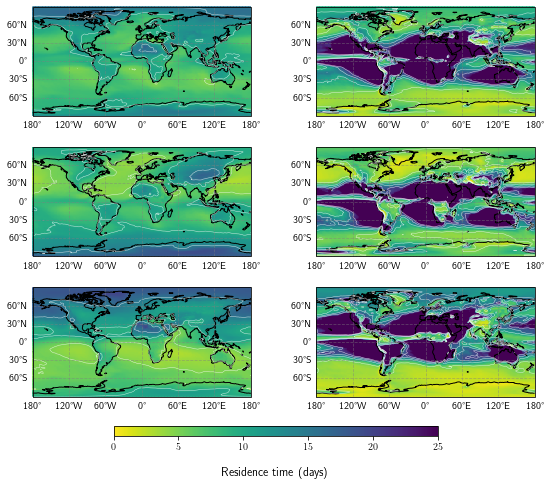

In [2]:
# Fig 9: maps of q/p vs RT

# now make the map plots:
fig = plt.figure(figsize=(9,7))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = 'viridis_r'
cmap2 = 'viridis_r'

cmax = 25
cmin = 0

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of left column
ax2 = fig.add_subplot(grid[2], projection=proj) # middle cell of left column
ax3 = fig.add_subplot(grid[4], projection=proj) # lower cell of left column
ax4 = fig.add_subplot(grid[1], projection=proj) # upper cell of right column
ax5 = fig.add_subplot(grid[3], projection=proj) # middle cell of right column
ax6 = fig.add_subplot(grid[5], projection=proj) # lower cell of right column

#---------Residence Time------------
# upper panel: annual mean
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_p1.mean_RT.plot(ax = ax1,
                   cmap = cmap1,
                   transform = ccrs.PlateCarree(),
                   vmin = cmin,
                   vmax = cmax,
                   add_colorbar = False)
ds_p1.mean_RT.plot.contour(ax=ax1,  
                               levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

# middle panel: DJF
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['PRECTtime'].sel(season='DJF').plot(ax = ax2,
                                               cmap = cmap1,
                                               transform = ccrs.PlateCarree(),
                                               vmin = cmin,
                                               vmax = cmax,
                                               add_colorbar = False)
ds_weighted['PRECTtime'].sel(season='DJF').plot.contour(ax=ax2,  
                               levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

# bottom panel: JJA
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = ds_weighted['PRECTtime'].sel(season='JJA').plot(ax = ax3,
                                               cmap = cmap1,
                                               transform = ccrs.PlateCarree(),
                                               vmin = cmin,
                                               vmax = cmax, 
                                               add_colorbar = False)
ds_weighted['PRECTtime'].sel(season='JJA').plot.contour(ax=ax3,  
                               levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

fig.subplots_adjust(bottom = 0.05, wspace=0.3, hspace=0.02)
cb1_ax = fig.add_axes([0.25, 0.0, 0.5, 0.02])
cbar1 = fig.colorbar(im1, cax=cb1_ax, orientation = 'horizontal')
cbar1.set_label("Residence time (days)", size = 'large', labelpad = 15)

#-------Q/P----------
# upper panel: annual mean
ax4.coastlines()
gl = ax4.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds.qonp.mean(dim="time").plot(ax = ax4,
                                  cmap = cmap2,
                                  transform = ccrs.PlateCarree(),
                                  vmin = cmin,
                                  vmax = cmax,
                                  add_colorbar = False)
ds.qonp.mean(dim="time").plot.contour(ax=ax4,  
                     levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

# middle panel: DJF
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['qonp'].sel(season='DJF').plot(ax = ax5,
                                               cmap = cmap2,
                                               transform = ccrs.PlateCarree(),
                                               vmin = cmin,
                                               vmax = cmax,
                                               add_colorbar = False)
ds_weighted['qonp'].sel(season="DJF").plot.contour(ax=ax5,  
                     levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

# bottom panel: JJA
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = ds_weighted['qonp'].sel(season='JJA').plot(ax = ax6,
                                               cmap = cmap2,
                                               transform = ccrs.PlateCarree(),
                                               vmin = cmin,
                                               vmax = cmax, 
                                               add_colorbar = False)
ds_weighted['qonp'].sel(season="JJA").plot.contour(ax=ax6,  
                     levels = [5, 10, 15, 20], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.5, 0.5, 0.5, 0.5],
                               alpha = 0.75)

# cb2_ax = fig.add_axes([0.58, 0.0, 0.3, 0.02])
# cbar2 = fig.colorbar(im2, cax=cb2_ax, orientation = 'horizontal')
# cbar2.set_label("Depletion time (days)", size = 'large', labelpad = 15)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title('')
ax5.set_title('')
ax6.set_title('')

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/fig10.png',dpi=dpi_out,bbox_inches='tight')

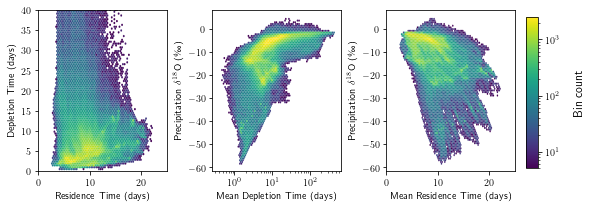

In [4]:
# Figure 11: scatter plots between d18O, RT, and Q/P - compare left panel to aggarwal figure 2.
# aggarwal uses monthly data here - consider switching this section up?
fig, (ax1,ax2,ax3) = plt.subplots(ncols = 3, figsize = (8,3))

# set threshold
#monthly_avr2 = monthly_avr
#monthly_avr2['qonp'] = monthly_avr2['qonp'].where(monthly_avr2.qonp < 50, 51)

ax1.set_ylim([0,40])
ax1.set_xlim([0,25])
hb = ax1.hexbin('PRECTtime', 'qonp', data = monthly_avr,
               mincnt = 5, gridsize = 75, 
               norm = mpl.colors.LogNorm(5,2500),
               extent = (0,25,0,40), #yscale = 'log',
               linewidths = 0.01)
#ax.hexbin('PRECTtime','qonp', data = ds, mincnt = 100)
ax1.set_xlabel('Residence Time (days)')
ax1.set_ylabel('Depletion Time (days)')

# uncorrected d18O
hb = ax2.hexbin('qonp', 'PRECT_d18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75,
                linewidths = 0.01, xscale = 'log',
                norm = mpl.colors.LogNorm(5,2500))
# add x and y axis labels
ax2.set_xlabel('Mean Depletion Time (days)')
ax2.set_ylabel(r'Precipitation $\delta^{18}$O (‰)')

# add hexbins
ax3.set_xlim([0,25])
hb = ax3.hexbin(x='PRECTtime', y='PRECT_d18O',
                data = monthly_avr, mincnt = 5,
                gridsize = 75,
                linewidths = 0.01, #xscale = 'log',
                norm = mpl.colors.LogNorm(5,2500))

# print colorbar
# add x and y axis labels
ax3.set_xlabel('Mean Residence Time (days)')
ax3.set_ylabel(r'Precipitation $\delta^{18}$O (‰)')

plt.tight_layout()

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.2,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label('Bin count', size = 'large', labelpad = 15)

#plt.savefig('plots/fig11.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

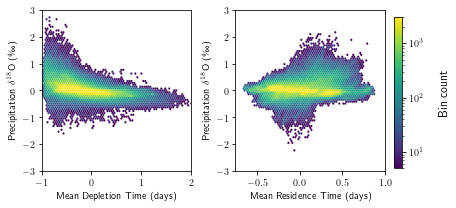

In [4]:
# Figure 12: anomalies between d18O, q/p, and RT - compare to aggarwal fig. 3
# NEEDS WORK!!!!!!!
#_-------------------
#--------------------
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (6,3))

ax1.set(xlim = (-1,2), ylim = (-3,3))
ax2.set(xlim = (-0.75,1), ylim = (-3,3))

# uncorrected d18O
hb = ax1.hexbin(x = 'qonp_anom_norm', y='d18O_anom_norm',
                data = monthly_avr,
                mincnt = 5,
                gridsize = 75,
                extent = (-1.0,2.0,-3,3),
                norm = mpl.colors.LogNorm(5,3000),
                linewidths = 0.01)

# add x and y axis labels
ax1.set_xlabel('Mean Depletion Time (days)')
ax1.set_ylabel(r'Precipitation $\delta^{18}$O (‰)')

# add hexbins
hb = ax2.hexbin(x='RT_anom_norm', y='d18O_anom_norm',
                data = monthly_avr,
                mincnt = 5,
                gridsize = 75,
                extent = (-0.75,1.0,-3,3),
                norm = mpl.colors.LogNorm(5,3000),
                linewidths = 0.01)

# print colorbar
# add x and y axis labels
ax2.set_xlabel('Mean Residence Time (days)')
ax2.set_ylabel(r'Precipitation $\delta^{18}$O (‰)')

plt.tight_layout()

# add a colorbar
fig.subplots_adjust(right = 0.9)
cbar_ax = fig.add_axes([0.92,0.2,0.02,0.7])
cbar = fig.colorbar(hb, cax = cbar_ax)
cbar.set_label('Bin count', size = 'large', labelpad = 15)

#plt.savefig('plots/fig12.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

<Figure size 648x648 with 0 Axes>

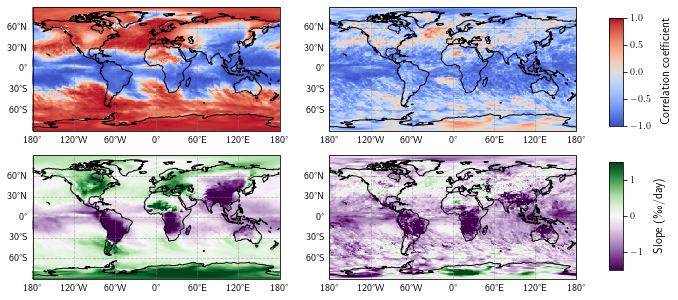

In [5]:
# Figure 13 - correlations between time and d18O, slopes of relationship between d18O and D18O.
# now make the map plots:
fig = plt.figure(figsize=(9,9))

# now make the map plots:
fig = plt.figure(figsize=(10,5))

grid = gridspec.GridSpec(nrows = 2,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = "coolwarm"
cmap2 = 'PRGn'

# Add the subplots
ax2 = fig.add_subplot(grid[0], projection=proj) # upper right cell of grid
ax3 = fig.add_subplot(grid[1], projection=proj) # lower left cell of grid
ax5 = fig.add_subplot(grid[2], projection=proj) # lower left cell of grid
ax6 = fig.add_subplot(grid[3], projection=proj) # lower right cell of grid

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(monthly_avr.PRECTtime,monthly_avr.PRECT_d18O,dim="month").plot(ax = ax2,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# upper panel: correlation between d'18O and ln(f)
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(ds_ann.PRECTtime,ds_ann.PRECT_d18O,dim="time").plot(ax = ax3,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# middle panel: correlation between d'18O and ln(f)
# plot slope between lnf and d18O at different places
def linear_trend(x,y):
    pf = np.polyfit(x,y,1)
    # need to return a dataarray (is this neeeded?)
    return xr.DataArray(pf[0])

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       monthly_avr.PRECTtime,monthly_avr.PRECT_d18O,
                       vectorize=True,
                       input_core_dims=[['month'], ['month']],)

slopes = slopes

# average slope of d18O vs lnf
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = slopes.plot(ax=ax5,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
            add_colorbar = False)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds_ann.PRECTtime,ds_ann.PRECT_d18O,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

slopes = slopes

# average slope of d18O vs lnf
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax6,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1.5, vmax = 1.5,
            add_colorbar = False)


fig.subplots_adjust(right = 0.93, wspace=0.05)
cb1_ax = fig.add_axes([0.95, 0.55, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax = cb1_ax)
cbar1.set_label("Correlation coefficient", size = 'large', labelpad = 10)

cb2_ax = fig.add_axes([0.95, 0.15, 0.02, 0.3]) 
cbar2 = fig.colorbar(im2, cax = cb2_ax)
cbar2.set_label(r'Slope (‰/day)', size = 'large', labelpad = 10)


#plt.savefig('plots/fig13.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

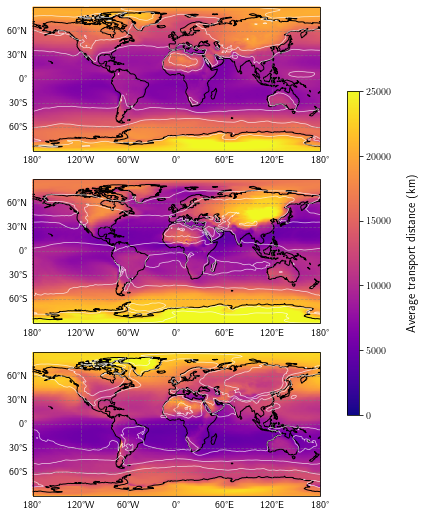

In [6]:
# Figure  transport distances

# now make the map plots:
fig = plt.figure(figsize=(9,9))

grid = gridspec.GridSpec(nrows = 3,
                        ncols = 1,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap = "plasma"

# Add the subplots
ax1 = fig.add_subplot(grid[0], projection=proj) # upper cell of grid
ax2 = fig.add_subplot(grid[1], projection=proj) # middle cell of grid
ax3 = fig.add_subplot(grid[2], projection=proj) # lower cell of grid

# upper panel: annual mean
ax1.coastlines()
gl = ax1.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds.PRECTdist.mean(dim="time").plot(ax = ax1,
                                  cmap = cmap,
                                  transform = ccrs.PlateCarree(),
                                  vmin = 0,
                                  vmax = 25000, 
                                  add_colorbar = False)
ds.PRECTdist.mean(dim="time").plot.contour(ax=ax1,  
                               levels = [5000, 10000, 15000, 20000], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.75)

# middle panel: DJF
ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ds_weighted['PRECTdist'].sel(season='DJF').plot(ax = ax2,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = 0,
                                               vmax = 25000, 
                                               add_colorbar = False)
ds_weighted['PRECTdist'].sel(season='DJF').plot.contour(ax=ax3,  
                               levels = [5000, 10000, 15000, 20000], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.75)

# bottom panel: JJA
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im = ds_weighted['PRECTdist'].sel(season='JJA').plot(ax = ax3,
                                               cmap = cmap,
                                               transform = ccrs.PlateCarree(),
                                               vmin = 0,
                                               vmax = 25000, 
                                               add_colorbar = False)
ds_weighted['PRECTdist'].sel(season='JJA').plot.contour(ax=ax2,  
                               levels = [5000, 10000, 15000, 20000], 
                               colors = ['w', 'w', 'w', 'w'],
                               linewidths = [0.75, 0.75, 0.75, 0.75],
                               alpha = 0.75)

ax1.set_title('')
ax2.set_title('')
ax3.set_title('')

fig.subplots_adjust(right=0.95, wspace=0.02, hspace=0.2)
cb_ax = fig.add_axes([0.80, 0.25, 0.02, 0.5])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label("Average transport distance (km)", size = 'large', labelpad = 15)

#plt.tight_layout()
plt.draw()
#plt.savefig('plots/fig14.png',dpi=dpi_out,bbox_inches='tight')

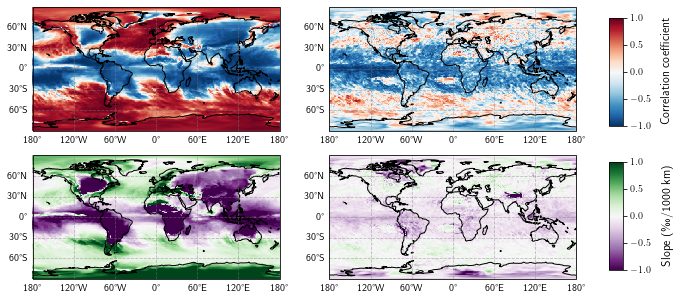

In [7]:
# Figure 13 - correlations between time and d18O, slopes of relationship between d18O and D18O.
# now make the map plots:
fig = plt.figure(figsize=(10,5))

grid = gridspec.GridSpec(nrows = 2,
                        ncols = 2,
                        figure = fig)

# set some parameters for the maps
proj = ccrs.PlateCarree()
cmap1 = "RdBu_r"
cmap2 = 'PRGn'

# Add the subplots
ax2 = fig.add_subplot(grid[0], projection=proj) # upper right cell of grid
ax3 = fig.add_subplot(grid[1], projection=proj) # lower left cell of grid
ax5 = fig.add_subplot(grid[2], projection=proj) # lower left cell of grid
ax6 = fig.add_subplot(grid[3], projection=proj) # lower right cell of grid

ax2.coastlines()
gl = ax2.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(monthly_avr.PRECTdist,monthly_avr.PRECT_d18O,dim="month").plot(ax = ax2,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# upper panel: correlation between d'18O and ln(f)
ax3.coastlines()
gl = ax3.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im1 = xr.corr(ds_ann.PRECTdist,ds_ann.PRECT_d18O,dim="time").plot(ax = ax3,
                                  cmap = cmap1,
                                  transform = ccrs.PlateCarree(),
                                  vmin = -1,
                                  vmax = 1,
                                  add_colorbar = False)

# middle panel: correlation between d'18O and ln(f)
# plot slope between lnf and d18O at different places
def linear_trend(x,y):
    pf = np.polyfit(x,y,1)
    # need to return a dataarray (is this neeeded?)
    return xr.DataArray(pf[0])

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       monthly_avr.PRECTdist,monthly_avr.PRECT_d18O,
                       vectorize=True,
                       input_core_dims=[['month'], ['month']],)

slopes = slopes*1000

# average slope of d18O vs lnf
ax5.coastlines()
gl = ax5.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
im2 = slopes.plot(ax=ax5,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1, vmax = 1,
            add_colorbar = False)

# now try applying across the dataframe.
slopes = xr.apply_ufunc(linear_trend,
                       ds_ann.PRECTdist,ds_ann.PRECT_d18O,
                       vectorize=True,
                       input_core_dims=[['time'], ['time']],)

slopes = slopes*1000

# average slope of d18O vs lnf
ax6.coastlines()
gl = ax6.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
slopes.plot(ax=ax6,transform = ccrs.PlateCarree(),
            cmap = cmap2, vmin = -1, vmax = 1,
            add_colorbar = False)

fig.subplots_adjust(right = 0.93, wspace=0.05)
cb1_ax = fig.add_axes([0.95, 0.55, 0.02, 0.3]) 
cbar1 = fig.colorbar(im1, cax = cb1_ax)
cbar1.set_label("Correlation coefficient", size = 'large', labelpad = 10)

cb2_ax = fig.add_axes([0.95, 0.15, 0.02, 0.3]) 
cbar2 = fig.colorbar(im2, cax = cb2_ax)
cbar2.set_label(r'Slope (‰/1000 km)', size = 'large', labelpad = 10)

#plt.savefig('plots/fig15.png',dpi=dpi_out,bbox_inches='tight')
plt.show()

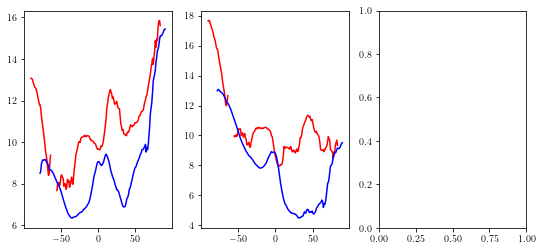

In [8]:
ds_zon = xr.Dataset(
    data_vars={'ann_RT_lnd':  (('lat'), ds_p1.mean_RT.where(ds_p1.landfrac >= 0.5).mean(dim = 'lon')),
               'ann_RT_ocn':  (('lat'), ds_p1.mean_RT.where(ds_p1.landfrac < 0.5).mean(dim = 'lon')),
               'djf_RT_lnd':  (('lat'), ds_weighted.PRECTtime.sel(season = 'DJF').where(ds_p1.landfrac >= 0.5).mean(dim = 'lon')),
               'djf_RT_ocn':  (('lat'), ds_weighted.PRECTtime.sel(season = 'DJF').where(ds_p1.landfrac < 0.5).mean(dim = 'lon'))
               },
    coords = {'lat': ds.lat}
    )


fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(9,4))

ax1.plot('lat', 'ann_RT_lnd', data = ds_zon, color = 'red')
ax1.plot('lat', 'ann_RT_ocn', data = ds_zon, color = 'blue')

ax2.plot('lat', 'djf_RT_lnd', data = ds_zon, color = 'red')
ax2.plot('lat', 'djf_RT_ocn', data = ds_zon, color = 'blue')

Text(0.5, 0, 'Time')

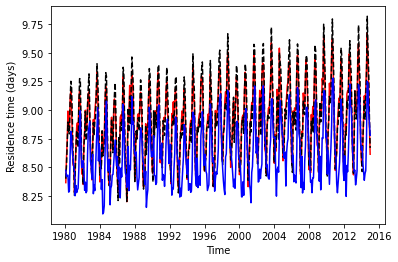

In [2]:
# get free data
ds_free = xr.open_dataset('~/Dropbox/tagging_analysis/proc_data/iCAM6_nudg_monthly.nc', decode_times = False, decode_timedelta = False)

# get global average residence time
weights = np.cos(np.deg2rad(ds.lat))

ds['RT_prect'] = ds.PRECTtime * ds.PRECT

ds_weighted = ds.weighted(weights)

weighted_mean = ds_weighted.mean(('lat','lon'))

weighted_mean

weighted_mean['gRTp'] = (weighted_mean['TMQ']/1000)/(weighted_mean['PRECT']*86400)
weighted_mean['gRTe'] = (weighted_mean['TMQ']/1000)/(weighted_mean['QFLX']*86400/1000)
weighted_mean['tRT'] = weighted_mean['RT_prect']/weighted_mean['PRECT']

fig, ax = plt.subplots()

ax.plot('time', 'gRTp', data = weighted_mean, color = 'red')
ax.plot('time', 'gRTe', data = weighted_mean, color = 'black', linestyle = 'dashed')
ax.plot('time', 'PRECTtime', data = weighted_mean, color = 'blue')

ax.set_ylabel('Residence time (days)')
ax.set_xlabel('Time')

# perhaps this offset is due to a different definition of what atmospheric water is
# check how TMQ is calculated in CAM.
# plt.savefig('time_comparison.png',dpi=dpi_out,bbox_inches='tight')

(array([3.00000e+01, 4.70000e+01, 9.70000e+01, 3.07000e+02, 8.67000e+02,
        5.42200e+03, 2.72820e+04, 7.89140e+04, 1.71816e+05, 2.81515e+05,
        3.87650e+05, 4.81545e+05, 5.54329e+05, 6.11303e+05, 6.52958e+05,
        6.75124e+05, 6.76889e+05, 6.74184e+05, 6.71807e+05, 6.75598e+05,
        6.78183e+05, 6.81533e+05, 6.80887e+05, 6.73715e+05, 6.54290e+05,
        6.31655e+05, 6.07290e+05, 5.77178e+05, 5.32823e+05, 4.82573e+05,
        4.29964e+05, 3.79455e+05, 3.26258e+05, 2.86139e+05, 2.49774e+05,
        2.28934e+05, 2.09778e+05, 1.97700e+05, 1.78969e+05, 1.63600e+05,
        1.44749e+05, 1.27643e+05, 1.17257e+05, 1.11346e+05, 1.00520e+05,
        9.26530e+04, 8.25680e+04, 7.33370e+04, 6.10030e+04, 5.22340e+04,
        4.17720e+04, 3.48100e+04, 2.51110e+04, 1.73330e+04, 1.15200e+04,
        6.97700e+03, 4.21000e+03, 2.00100e+03, 1.38000e+03, 7.30000e+02,
        4.12000e+02, 2.65000e+02, 1.56000e+02, 7.30000e+01, 8.10000e+01,
        5.30000e+01, 2.20000e+01, 1.50000e+01, 1.30

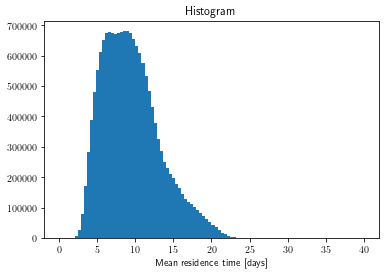

In [10]:
# histogram?
ds.PRECTtime.plot.hist(bins = 100)